
<img src="../images/HKA_MMT_Logo.png" width="350"> 

# <font color='2869AF'> Künstliche Intelligenz - Kapitel 10</font> 
### <font color='2869AF'> Convolutional Neruonal Network mit dem MNIST Digit Dataset </font> 


### Frau Prof.Dr.-Ing. habil. Catherina Burghart                               


## <font color='2869AF'> Aufgabe </font> 
In diesem Kapitel soll ein CNN für den MNIST Digit Datensatz aufgebaut und trainiert werden
### <font color='2869AF'> Vorgehensweise</font>
1. Importieren des Datensatzes
2. Aufbereiten der Daten 
3. CNN Model aufbauen und trainiern 
4. Auswerten des Models
5. Vorhersagen von Daten

### <font color='2869AF'> 1. Importieren des Datensatzes </font>
Der Datensatz kann direkt über die Bibliothek keras importiert werden

In [7]:
from keras.datasets import mnist 
import keras
import pandas as pd


In [8]:
col_names = ['contour number', 'aspect ratio', 'extent', 'Blue', 'Green', 'Red', 'Hue', 'class']
data = pd.read_csv("output.csv", skiprows=1, header=None, names=col_names)
data.head(10)

,contour number,aspect ratio,extent,Blue,Green,Red,Hue,class
0,28,0.923077,0.803775,42.769815,97.239460,115.102867,19.023609,0
1,68,0.979804,0.836557,63.621205,104.295904,104.446747,29.446747,0
2,51,0.760961,0.823015,59.701164,99.514131,103.025769,32.987531,0
3,31,0.957265,0.767948,50.077372,116.466180,137.658394,22.445255,0
4,50,0.828162,0.845766,60.658955,104.919383,113.961094,34.713985,0
5,47,0.890923,0.828608,52.141768,97.165096,107.391655,28.818304,0
6,45,0.950329,0.748096,48.570281,121.473896,109.674699,15.439759,0
7,39,0.901044,0.802361,56.255943,103.945878,107.513404,25.372281,0
8,53,0.539305,0.713518,44.690566,132.909434,108.475472,15.988679,0
9,47,0.915618,0.802961,51.757838,96.647207,110.642883,25.927928,0


In [10]:
# alles außer die letzte Spalte
X = data.iloc[:,:-1]
# nur die letzte Spalte  
y = data.iloc[:,-1]

print('X:',X.shape,'y:',y.shape)

X: (136, 7) y: (136,)


In [11]:
from locale import normalize
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   random_state=42)

print('X_train: ', X_train.shape, ' y_train: ',y_train.shape)
print('X_test: ', X_test.shape, ' y_test: ', y_test.shape)


# Da in jedem Datensatz die  Features eine Unterschiedliche Werteverteilung empfielt es sich die Daten zu normalisieren 
X_train_n=X_train.div(X_train.sum(axis=1),axis=0)
X_test_n=X_test.div(X_test.sum(axis=1),axis=0)

X_train:  (108, 7)  y_train:  (108,)
X_test:  (28, 7)  y_test:  (28,)


### <font color='2869AF'> 2. Aufbereiten des Datensatzes</font> 
Um die Daten verwenden zu können, müssen die Bilder noch in ein 1D Array umgewandelt werden. Des Weiteren empfiehlt es sich, die Daten noch zu normalisieren.  


In [13]:
# # Normalisieren der Daten
# X_train = X_train/255
# X_test = X_test/255 



# resizen der Bilder von einer 2D Matrix zu einem 1D-Array
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1 )





AttributeError: 'DataFrame' object has no attribute 'reshape'

### <font color='2869AF'> 3. CNN Model aufbauen und trainieren</font> 
Nachdem die Daten aufbereitet sind kann nun ein CNN Model mithilfe der Tensorflow Keras Bilbliothek erstellt werden

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

convolutional_neural_network = keras.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



In [5]:
# ausgeben der Zusammenfassung des Models
convolutional_neural_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 25)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        14464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [15]:
# Kompilieren des Models 
convolutional_neural_network.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# trainieren des Models
history = convolutional_neural_network.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))


Epoch 1/10


ValueError: in user code:

    File "/home/michelle/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/michelle/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/michelle/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/michelle/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/michelle/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/michelle/.local/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 7)


### <font color='2869AF'> 4.  Auswerten des Models</font> 
Um das Model zu evaluieren, werden verschiedene Kennzahlen und Metriken ausgegeben

313/313 - 2s - loss: 0.0456 - accuracy: 0.9887 - 2s/epoch - 6ms/step


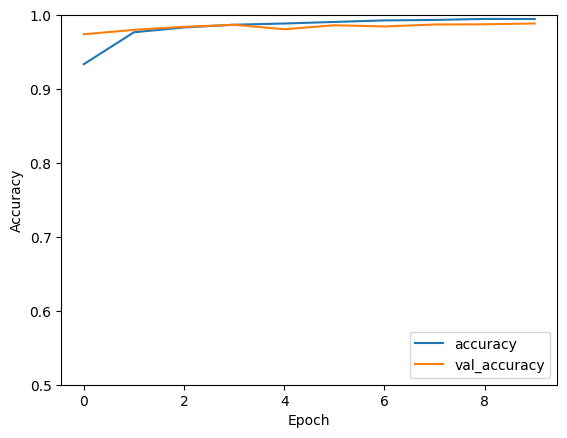

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = convolutional_neural_network.evaluate(X_test,  y_test, verbose=2)

### <font color='2869AF'> 5. Vorhersagen der Daten</font> 
Mithilfe des trainierten Netzes können Daten vorhergesagt werden

In [ ]:
import numpy as np
y_predicted_by_model = convolutional_neural_network.predict(X_test)


313/313 [==============================] - 5s 15ms/step


Vorhergesagte Klassen für die Test Bilder


[]

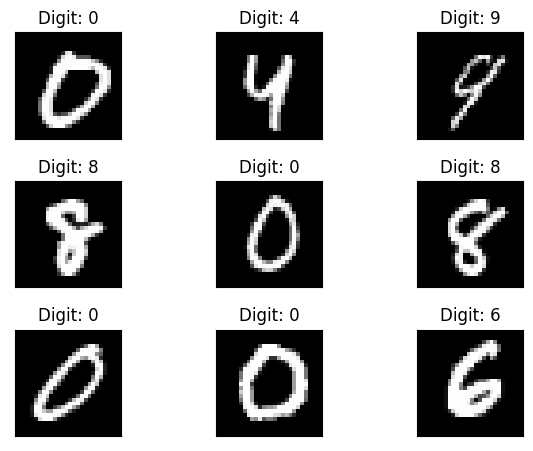

In [ ]:
from random import randrange

print("Vorhergesagte Klassen für die Test Bilder")
fig=plt.figure()
for i in range(9):
    random_number = randrange(313)
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[random_number],cmap='gray',interpolation='none')
    plt.title("Digit: {}".format(np.argmax(y_predicted_by_model[random_number])))
    plt.xticks([])
    plt.yticks([])
plt.plot()